<a href="https://colab.research.google.com/github/plaban1981/POCs/blob/main/PDF_pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Install PDF miner

In [2]:
!pip install --quiet pdfminer

     |████████████████████████████████| 4.2 MB 34.5 MB/s 
     |████████████████████████████████| 2.0 MB 57.1 MB/s 


In [3]:
!pip install --quiet pdfminer.six

     |████████████████████████████████| 5.6 MB 23.4 MB/s 
     |████████████████████████████████| 3.6 MB 60.9 MB/s 


In [4]:
path = "/content/drive/MyDrive/ZeoanAI_Poc/HR_Policy-GGIAL.pdf"

In [ ]:
from pdfminer.high_level import extract_pages
from pdfminer.layout import LTTextContainer, LTChar,LTLine,LAParams
import os
#path=r'/home/somdev/Documents/PDF Pre-Processing/GIL_Policy on Disclosure of Material Events_SS.pdf'

Extract_Data=[]
bold = False
Extract_Headers = []

for page_layout in extract_pages(path):
    for element in page_layout:
        if isinstance(element, LTTextContainer):
            for text_line in element:
                for character in text_line:
                    if isinstance(character, LTChar):
                        Font_size=character.size
                        if 'Bold' in character.fontname:
                            bold = True
                        else: 
                            bold = False
            if bold == True:
              Extract_Headers.append(element.get_text())                
            Extract_Data.append([Font_size,bold,(element.get_text())])

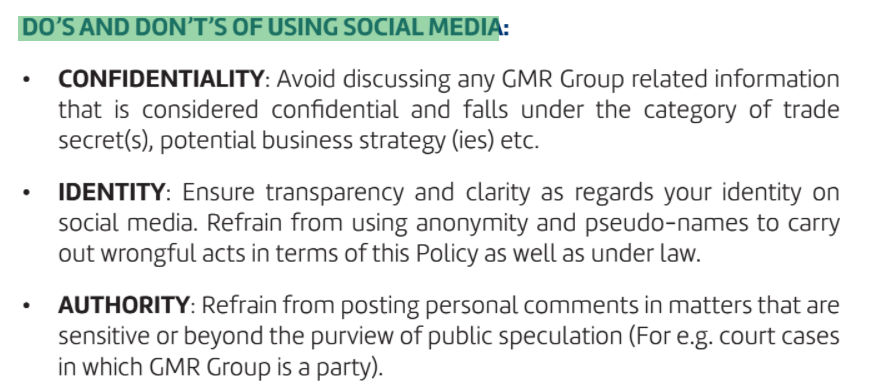

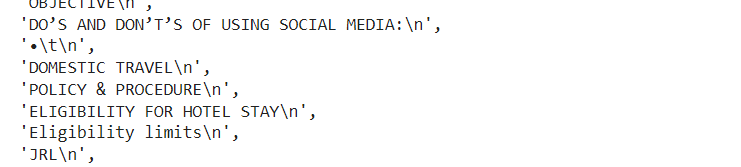

In [ ]:
Extract_Headers

['HR POLICY HANDBOOK\n2017\n',
 'VISION\n',
 'GMR VALUES AND BELIEFS\n',
 'FOREWORD\n',
 'CONTENT\n',
 'CLASSIFICATION OF JOB RESPONSIBILITY LEVEL (JRL)\n',
 'Band\n',
 'Description\n',
 'JRL / \nGrade\n',
 'Band\n',
 'Description\n',
 'JRL / \nGrade\n',
 'CLASSIFICATION OF JOB RESPONSIBILITY LEVEL (JRL)\n',
 'Band\n',
 'Description\n',
 'JRL / \nGrade\n',
 'EMPLOYEE WELFARE \n',
 'FLEXIBLE COMPENSATION & BENEFIT PLAN\n',
 'ELIGIBILITY & APPLICABILITY\n',
 'POLICY & PROCEDURE\n',
 'Fixed Components\n',
 'My Plan (FCBP)\n',
 'Level \n',
 'Petrol Allowance\n',
 'LTA (Per Annum)\n(May choose any one amount)\n',
 'CODE OF BUSINESS CONDUCT & ETHICS (COBCE)\n',
 'APPLICABILITY\n',
 'COBCE covers guidelines of Conduct for the below: \n',
 'GRIEVANCE MANAGEMENT\n',
 'WHISTLE BLOWER \n',
 'POLICY & PROCEDURE\n',
 'SEXUAL HARASSMENT\n',
 'POLICY & PROCEDURE\n',
 'GROOMING & DRESS CODE POLICY\n',
 'ELIGIBILITY & APPLICABILITY:\n',
 'PROCEDURE \n',
 'GMR INFORMATION SECURITY \n',
 'APPLICABILITY\n

In [ ]:
Extract_Data

[[26.5783, True, 'HR POLICY HANDBOOK\n2017\n'],
 [13.0, True, 'VISION\n'],
 [10.0,
  False,
  'GMR Group will be an institution in perpetuity that\nwill build entrepreneurial organizations making a difference \nto society through creation of value.\n'],
 [13.0, True, 'GMR VALUES AND BELIEFS\n'],
 [6.5, False, '1  | Pragyan - Policy Handbook\n'],
 [13.0, True, 'FOREWORD\n'],
 [10.0, False, 'Dear Colleague,\n'],
 [10.0,
  False,
  'It is indeed a privilege to have you as a member of our GMR \nfamily.\n'],
 [10.0,
  False,
  'It gives us immense pleasure to share this booklet containing \nthe essence of our HR Policies.\n'],
 [10.0,
  False,
  '“Pragyan” provides us with an opportunity to learn about our \nvarious HR policies and enhance our understanding of these \npolicies.\n'],
 [10.0,
  False,
  'We are sure that this booklet will make it easy for you to refer \nto these policies instead of relying on memory.\n'],
 [10.0, False, 'Happy reading!!\n'],
 [10.000000000000014, False, 'Anir

In [ ]:
#!/usr/bin/env python
from pdfminer.pdfparser import PDFParser
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfpage import PDFPage
from pdfminer.pdfinterp import PDFResourceManager
from pdfminer.pdfinterp import PDFPageInterpreter
from pdfminer.layout import LAParams
from pdfminer.converter import PDFPageAggregator
import pdfminer


def createPDFDoc(fpath):
    fp = open(fpath, 'rb')
    parser = PDFParser(fp)
    document = PDFDocument(parser, password='')
    # Check if the document allows text extraction. If not, abort.
    if not document.is_extractable:
        raise "Not extractable"
    else:
        return document


def createDeviceInterpreter():
    rsrcmgr = PDFResourceManager()
    laparams = LAParams()
    device = PDFPageAggregator(rsrcmgr, laparams=laparams)
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    return device, interpreter


def parse_obj(objs):
    for obj in objs:
        if isinstance(obj, pdfminer.layout.LTTextBox):
            for o in obj._objs:
                if isinstance(o,pdfminer.layout.LTTextLine):
                    text=o.get_text()
                    if text.strip():
                        for c in  o._objs:
                            if isinstance(c, pdfminer.layout.LTChar):
                                print ("fontname %s"%c.fontname)
        # if it's a container, recurse
        elif isinstance(obj, pdfminer.layout.LTFigure):
            parse_obj(obj._objs)
        else:
            pass


document=createPDFDoc(path)
device,interpreter=createDeviceInterpreter()
pages=PDFPage.create_pages(document)
interpreter.process_page(pages.next())
layout = device.get_result()


parse_obj(layout._objs)

AttributeError: ignored

## Extracting headers and paragraphs from a PDF

##Fitz 


https://towardsdatascience.com/extracting-headers-and-paragraphs-from-pdf-using-pymupdf-676e8421c467

In [5]:
!pip install --quiet fitz

     |████████████████████████████████| 3.2 MB 57.1 MB/s 
     |████████████████████████████████| 78 kB 8.6 MB/s 
     |████████████████████████████████| 421 kB 70.8 MB/s 
     |████████████████████████████████| 130 kB 68.1 MB/s 
     |████████████████████████████████| 482 kB 77.9 MB/s 
     |████████████████████████████████| 5.1 MB 69.8 MB/s 
     |████████████████████████████████| 41 kB 780 kB/s 
     |████████████████████████████████| 6.4 MB 48.2 MB/s 


In [6]:
!pip install --quiet PyMuPDF

     |████████████████████████████████| 8.7 MB 15.3 MB/s 


In [14]:
def fonts(doc, granularity=False):
    """Extracts fonts and their usage in PDF documents.
    :param doc: PDF document to iterate through
    :type doc: <class 'fitz.fitz.Document'>
    :param granularity: also use 'font', 'flags' and 'color' to discriminate text
    :type granularity: bool
    :rtype: [(font_size, count), (font_size, count}], dict
    :return: most used fonts sorted by count, font style information
    """
    styles = {}
    font_counts = {}

    for page in doc:
        blocks = page.get_text("dict")["blocks"]
        for b in blocks:  # iterate through the text blocks
            if b['type'] == 0:  # block contains text
                for l in b["lines"]:  # iterate through the text lines
                    for s in l["spans"]:  # iterate through the text spans
                        if granularity:
                            identifier = "{0}_{1}_{2}_{3}".format(s['size'], s['flags'], s['font'], s['color'])
                            styles[identifier] = {'size': s['size'], 'flags': s['flags'], 'font': s['font'],
                                                  'color': s['color']}
                        else:
                            identifier = "{0}".format(s['size'])
                            styles[identifier] = {'size': s['size'], 'font': s['font']}

                        font_counts[identifier] = font_counts.get(identifier, 0) + 1  # count the fonts usage

    font_counts = sorted(font_counts.items(), key=itemgetter(1), reverse=True)

    if len(font_counts) < 1:
        raise ValueError("Zero discriminating fonts found!")

    return font_counts, styles

In [15]:
def font_tags(font_counts, styles):
    """Returns dictionary with font sizes as keys and tags as value.
    :param font_counts: (font_size, count) for all fonts occuring in document
    :type font_counts: list
    :param styles: all styles found in the document
    :type styles: dict
    :rtype: dict
    :return: all element tags based on font-sizes
    """
    p_style = styles[font_counts[0][0]]  # get style for most used font by count (paragraph)
    p_size = p_style['size']  # get the paragraph's size

    # sorting the font sizes high to low, so that we can append the right integer to each tag 
    font_sizes = []
    for (font_size, count) in font_counts:
        font_sizes.append(float(font_size))
    font_sizes.sort(reverse=True)

    # aggregating the tags for each font size
    idx = 0
    size_tag = {}
    for size in font_sizes:
        idx += 1
        if size == p_size:
            idx = 0
            size_tag[size] = '<p>'
        if size > p_size:
            size_tag[size] = '<h{0}>'.format(idx)
        elif size < p_size:
            size_tag[size] = '<s{0}>'.format(idx)

    return size_tag

* 

In [13]:
#<header> --> <h>, <paragraph> --> <p> or <subscript> --> <s3>
def headers_para(doc, size_tag):
    """Scrapes headers & paragraphs from PDF and return texts with element tags.
    :param doc: PDF document to iterate through
    :type doc: <class 'fitz.fitz.Document'>
    :param size_tag: textual element tags for each size
    :type size_tag: dict
    :rtype: list
    :return: texts with pre-prended element tags
    """
    header_para = []  # list with headers and paragraphs
    first = True  # boolean operator for first header
    previous_s = {}  # previous span

    for page in doc:
        blocks = page.get_text("dict")["blocks"]
        for b in blocks:  # iterate through the text blocks
            if b['type'] == 0:  # this block contains text

                # REMEMBER: multiple fonts and sizes are possible IN one block

                block_string = ""  # text found in block
                for l in b["lines"]:  # iterate through the text lines
                    for s in l["spans"]:  # iterate through the text spans
                        if s['text'].strip():  # removing whitespaces:
                            if first:
                                previous_s = s
                                first = False
                                block_string = size_tag[s['size']] + s['text']
                            else:
                                if s['size'] == previous_s['size']:

                                    if block_string and all((c == "|") for c in block_string):
                                        # block_string only contains pipes
                                        block_string = size_tag[s['size']] + s['text']
                                    if block_string == "":
                                        # new block has started, so append size tag
                                        block_string = size_tag[s['size']] + s['text']
                                    else:  # in the same block, so concatenate strings
                                        block_string += " " + s['text']

                                else:
                                    header_para.append(block_string)
                                    block_string = size_tag[s['size']] + s['text']

                                previous_s = s

                    # new block started, indicating with a pipe
                    block_string += "|"

                header_para.append(block_string)

    return header_para

In [9]:
import fitz

In [10]:
doc = fitz.open(path)     # or fitz.Document(filename)

In [11]:
from operator import itemgetter

In [16]:
font_counts, styles = fonts(doc, granularity=False)

In [17]:
size_tag = font_tags(font_counts, styles)

In [18]:
size_tag

{4.667200088500977: '<s12>',
 5.0: '<s11>',
 5.5: '<s10>',
 5.800000190734863: '<s9>',
 6.0: '<s8>',
 6.5: '<s7>',
 6.899951457977295: '<s6>',
 6.990200042724609: '<s5>',
 7.0: '<s4>',
 7.5: '<s3>',
 7.683800220489502: '<s2>',
 7.738399982452393: '<s1>',
 8.0: '<p>',
 8.050100326538086: '<h13>',
 8.922100067138672: '<h12>',
 9.0: '<h11>',
 9.1072998046875: '<h10>',
 9.611000061035156: '<h9>',
 9.615300178527832: '<h8>',
 10.0: '<h7>',
 10.999967575073242: '<h6>',
 12.000012397766113: '<h5>',
 13.0: '<h4>',
 21.262699127197266: '<h3>',
 26.57830047607422: '<h2>',
 27.818599700927734: '<h1>'}

In [19]:
header_para = headers_para(doc, size_tag)

In [20]:
header_para

['<h3>HR POLICY HANDBOOK|',
 '',
 '<h2>2017|',
 '',
 '<s7>1  | Pragyan - Policy Handbook|',
 '',
 '<h4>VISION|',
 '',
 '<h7>GMR Group will be an institution in perpetuity that|',
 '<h7>will build entrepreneurial organizations making a difference |',
 '<h7>to society through creation of value.|',
 '',
 '<h4>GMR VALUES AND BELIEFS|',
 '',
 '<s7>2  | Pragyan - Policy Handbook|',
 '',
 '<h4>FOREWORD|',
 '',
 '<h7>Dear Colleague,|',
 '<h7>It is indeed a privilege to have you as a member of our GMR | family.|',
 '<h7>It gives us immense pleasure to share this booklet containing | the essence of our HR Policies.|',
 '<h7>“Pragyan” provides us with an opportunity to learn about our | various HR policies and enhance our understanding of these | policies.|',
 '<h7>We are sure that this booklet will make it easy for you to refer | to these policies instead of relying on memory.|',
 '<h7>Happy reading!!|',
 '<h7>Aniruddha Ganguly| Group President - HR|',
 '',
 '<p>Note:  Policy & Processes are sub

In [45]:
len(header),len(text)

(894, 894)

In [42]:
header = []
text = []
for items in header_para:
  if items.startswith('<h'):
    header.append(items[items.index(">")+1:].replace("|",""))
    text.append("")
  elif items.startswith('<p'):
    header.append("")
    text.append(items[items.index(">")+1:].replace("|",""))
  else :
    header.append("")
    text.append(items)


In [43]:
header

['HR POLICY HANDBOOK',
 '',
 '2017',
 '',
 '',
 '',
 'VISION',
 '',
 'GMR Group will be an institution in perpetuity that',
 'will build entrepreneurial organizations making a difference ',
 'to society through creation of value.',
 '',
 'GMR VALUES AND BELIEFS',
 '',
 '',
 '',
 'FOREWORD',
 '',
 'Dear Colleague,',
 'It is indeed a privilege to have you as a member of our GMR  family.',
 'It gives us immense pleasure to share this booklet containing  the essence of our HR Policies.',
 '“Pragyan” provides us with an opportunity to learn about our  various HR policies and enhance our understanding of these  policies.',
 'We are sure that this booklet will make it easy for you to refer  to these policies instead of relying on memory.',
 'Happy reading!!',
 'Aniruddha Ganguly Group President - HR',
 '',
 '',
 '',
 '',
 '',
 '04    Classification of Job Responsibility Level',
 '06    Employee Welfare Policy',
 ' - Marriage Gift  - Marriage Gift',
 ' - Annual Health Checkup  - Annual Health 

In [44]:
text

['',
 '',
 '',
 '',
 '<s7>1  | Pragyan - Policy Handbook|',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '<s7>2  | Pragyan - Policy Handbook|',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'Note:  Policy & Processes are subject to change, for detailed & regular policy  update please refer to the policy portal.',
 '',
 '<s7>3  | Pragyan - Policy Handbook|',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '<s7>4  | Pragyan - Policy Handbook|',
 '',
 'All jobs in GMR Group are classified in to 4 bands. Direction, Integration,  Managerial & Execution ',
 'There are two streams of job roles in GMR Group: Managerial & Specialist',
 'The bands and grades have been arrived at through a systematic process  of Job Evaluation (JE). It is a process of deriving the relative worth of a job  or role in an organisation in a fair and logical man

In [37]:
text[100]

'<s8>integrating a number of small technical/professional teams) thereby | requiring understanding of all related technical disciplines within that | department / BU|'

In [38]:
text[100].index(">")

3